In [61]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [62]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
credit_risk_df = pd.read_csv("resources/lending_data.csv")

# Review the DataFrame
credit_risk_df.head(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [63]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = credit_risk_df['loan_status']

# Separate the X variable, the features
X = credit_risk_df.drop(columns=['loan_status'])

In [64]:
# Review the y variable Series
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [65]:
# Review the X variable DataFrame
X.head(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [66]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [67]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [68]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0
...,...,...
38069,0,0
36892,0,0
5035,0,0
40821,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [69]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, predictions)



array([[18679,    80],
       [   67,   558]], dtype=int64)

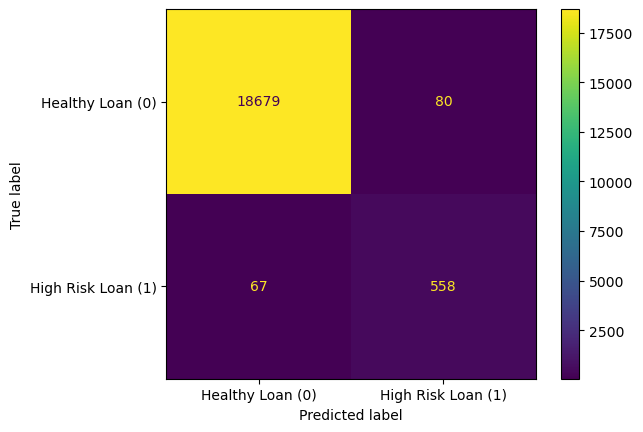

In [70]:
# Generate a confusion matrix for the model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
display_labels = ["Healthy Loan (0)", "High Risk Loan (1)"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()

In [71]:
# Print the classification report for the model
print(classification_report(y_test, predictions, target_names=display_labels))

                    precision    recall  f1-score   support

  Healthy Loan (0)       1.00      1.00      1.00     18759
High Risk Loan (1)       0.87      0.89      0.88       625

          accuracy                           0.99     19384
         macro avg       0.94      0.94      0.94     19384
      weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** This model works very well in predicting healthy loans with perfect precision and recall of 1.  High risk loans also seem to perform well with .87 precision and .89 recall.  Overall, the model achieves a high accuracy of 99%, which suggests it does exceptionally well in distinguishing between healthy and high-risk loans.

---